In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("./DataB.csv")
x = dataset.loc[:,"fea.1":"fea.784"]
target = dataset.loc[:, "gnd"]

#normalize data
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [2]:
# PCA
C = x

#covariance matrix
CTC = (C.T).dot(C)
eigenvalues, eigvect = np.linalg.eig(CTC)

#sort in increasing eigvalues
idx = eigenvalues.argsort()[::-1] 
eigenvalues = eigenvalues[idx]
eigvect = eigvect[:,idx]

#proyect data into eigenvectors
pcomponents = pd.DataFrame(x.dot(eigvect))

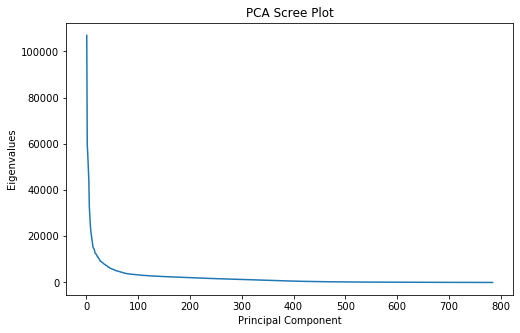

In [3]:
#screeplot of the eigenvalues
fig = plt.figure(figsize=(8,5))
plt.plot(range(1,785), eigenvalues)
plt.ylabel('Eigenvalues')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Somewhere around the first 50 principal components are the most relevant.

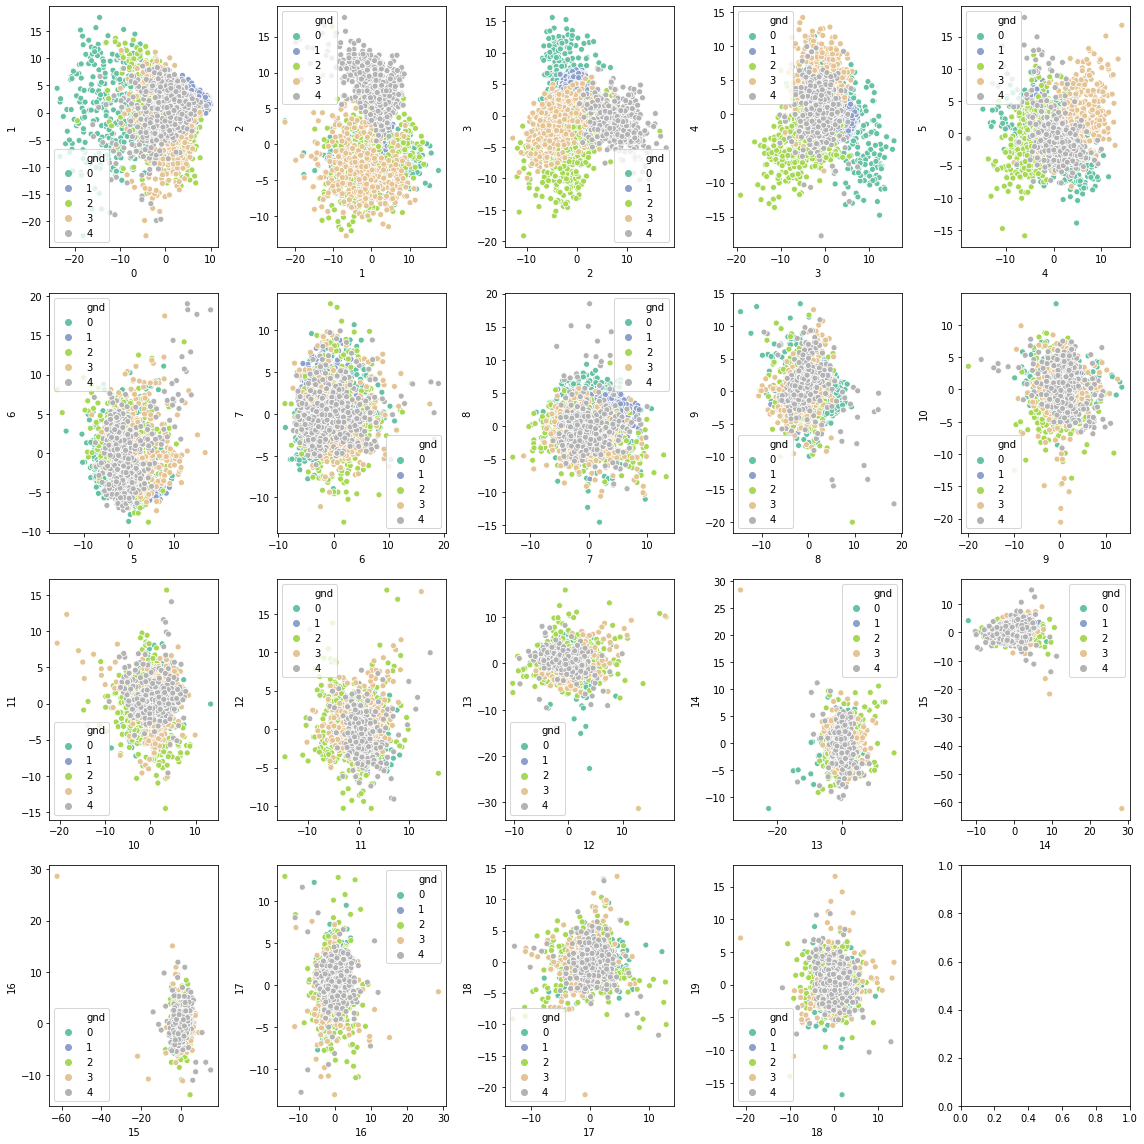

In [4]:
import seaborn as sns

fig, ax = plt.subplots(4, 5, figsize=(16,16))
i = 0

while i < 19:
    if i < 5:
        sns.scatterplot(x=pcomponents[i], y=pcomponents[i+1], hue=target, ax=ax[0,i], palette="Set2", legend="full")
    elif i < 10:
        sns.scatterplot(x=pcomponents[i], y=pcomponents[i+1], hue=target, ax=ax[1,i-5], palette="Set2", legend="full")
    elif i < 15:
        sns.scatterplot(x=pcomponents[i], y=pcomponents[i+1], hue=target, ax=ax[2,i-10], palette="Set2", legend="full")
    else:
        sns.scatterplot(x=pcomponents[i], y=pcomponents[i+1], hue=target, ax=ax[3,i-15], palette="Set2", legend="full")
    i = i+1

fig.tight_layout()
plt.show()

The first 6 principal components seem to be the most useful to differentiate between classes. You could probably classify pretty accurately using less than 10 principal components.

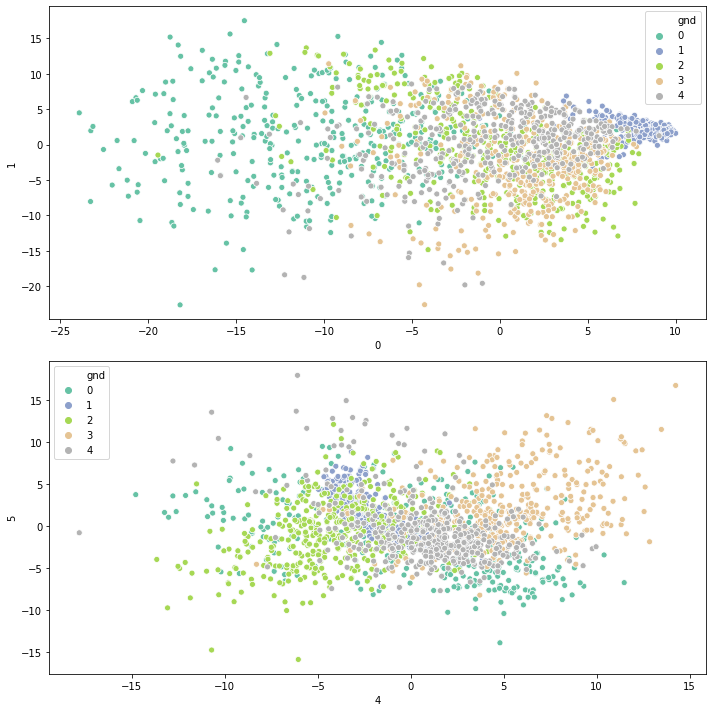

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.scatterplot(x=pcomponents[0], y=pcomponents[1], hue=target, palette="Set2", ax=ax[0], legend="full")
sns.scatterplot(x=pcomponents[4], y=pcomponents[5], hue=target, palette="Set2", ax=ax[1], legend="full")
fig.tight_layout()
plt.show()

In the first 2 principal components class 0 and 1 could be easily linearly separated. 

Although we shouldnt give meaning to components in PCA this 2 components together probably give a roundness characteristic. 

The 5th and 6th principal components class 2 and 3 could be linearly separated.

In [6]:
import time
#SVD
C = x.T
time_start = time.time()
CCT = (C).dot(C.T)
lamda, U = np.linalg.eig(CCT)
idx = lamda.argsort()[::-1] 
lamda = lamda[idx]
U = U[:,idx]
print('Single PCA Time elapsed: {} seconds'.format(time.time()-time_start))
print(lamda.size)

time_start = time.time()
CTC = (C.T).dot(C)
lamda, V = np.linalg.eig(CTC)
idx = lamda.argsort()[::-1] 
lamda = lamda[idx]
V = V[:,idx]
print('Dual PCA Time elapsed: {} seconds'.format(time.time()-time_start))
print(lamda.size)

Single PCA Time elapsed: 30.746402263641357 seconds
784
Dual PCA Time elapsed: 228.10580015182495 seconds
2066


In this case Dual PCA is slower, getting 2066 eigenvalues is 7 times more expensive than 784.

Dual PCA is more usefull when you have more dimensions than datapoints.

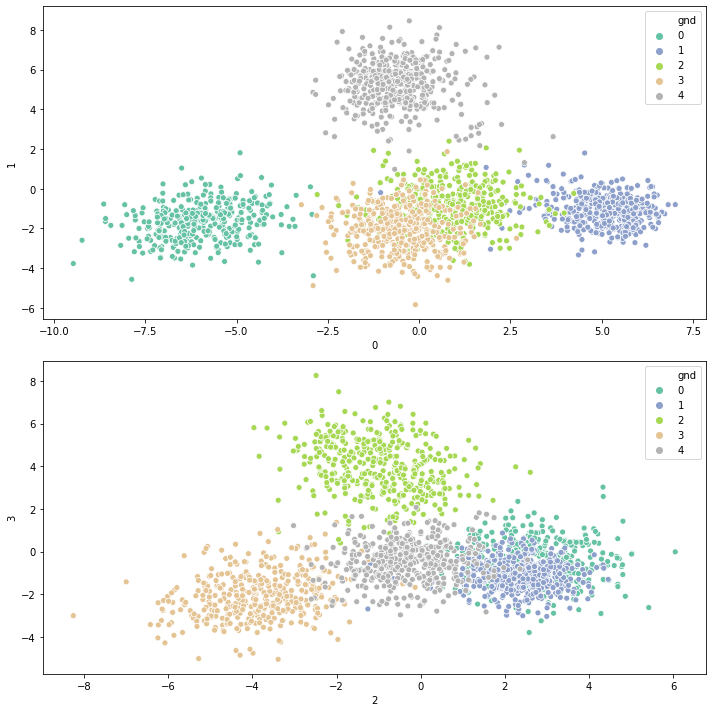

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

lda = LDA()
pcomponents = pd.DataFrame(lda.fit_transform(x, target))

fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.scatterplot(x=pcomponents[0], y=pcomponents[1], hue=target, palette="Set2", ax=ax[0], legend="full")
sns.scatterplot(x=pcomponents[2], y=pcomponents[3], hue=target, palette="Set2", ax=ax[1], legend="full")
fig.tight_layout()
plt.show()


The first and second direction are really good at separating 0, 1, and 4 and the third and fourth direction separate the classes 2 and 3.

LDA worked significantly better than PCA at separating classes which is obvious since LDA increases distances between classes and decreases the distance within classes.

